# ipl I317B Sécurité : labos
## Semaine 5: pcaps and probes

Dans cette fiche d'exercice, nous allons nous attarder sur certaines particularités de la norme 802.11, c'est-à-dire, le Wi-Fi et leurs implications sur la vie privée.

Nous allons observer les [management frames](https://en.wikipedia.org/wiki/IEEE_802.11#Management_frames) et particulièrement les « probe request frame » et les « probe response frame ». Celle-ci servent respectivement a demander à une station des informations et à répondre à cette demande.

L'[article suivant](https://www.enisa.europa.eu/publications/info-notes/passive-wifi-surveillance-and-access-point-hijacking) publié par l'ENISA, résume plutôt bien les problématiques que soulève le Wi-Fi tandis que [celui-ci](https://mrncciew.com/2014/10/27/cwap-802-11-probe-requestresponse/) entre un peu plus dans la technique.

Si vous souhaitez aller plus loin, une attaque exploitant cette "fonctionnalité" a été formalisée sous le nom [KARMA](https://en.wikipedia.org/wiki/KARMA_attack).

Pour cet exercice, nous allons utiliser un fichier pcap `capture-180214.pcap` que vous pourez trouver sur moodle. Ce paquet représente une capture Wi-Fi dans Louvain-La-Neuve et ses environs. Les paquets ont été filtré pour ne laisser que les paquets probe request et response.

In [1]:
from datetime import datetime
from scapy.all import *

# On peut lire le fichier d'un seul coup et tout mettre dans une liste ...
# => plusieurs giga en ram (3Gb ?)
# all_packets = rdpcap('capture-180214.pcap')
# 
# Pour éviter ça, on peut parcourir le fichier itérativement :
for packet in PcapReader('capture-180214.pcap'):
    print(packet.show())
    break

###[ RadioTap dummy ]### 
  version   = 0
  pad       = 0
  len       = 36
  present   = TSFT+Flags+Rate+Channel+dBm_AntSignal+RXFlags+RadiotapNS+Ext
  \Ext       \
   |###[ RadioTap Extended presence mask ]### 
   |  present   = b5+b11
  mac_timestamp= 6034608
  Flags     = FCS
  Rate      = 2
  ChannelFrequency= 2457
  ChannelFlags= CCK+2GHz
  dBm_AntSignal= -83dBm
  RXFlags   = 
  notdecoded= '\xad\x00'
###[ 802.11-FCS ]### 
     subtype   = 4
     type      = Management
     proto     = 0
     FCfield   = 
     ID        = 0
     addr1     = ff:ff:ff:ff:ff:ff
     addr2     = da:a1:19:01:85:98
     addr3     = ff:ff:ff:ff:ff:ff
     SC        = 4944
     fcs       = 0x1f4eabb
###[ 802.11 Probe Request ]### 
###[ 802.11 Information Element ]### 
           ID        = SSID
           len       = 12
           info      = 'VodafoneWiFi'
###[ 802.11 Rates ]### 
           ID        = 1
           len       = 4
           rates     = [0x2, 0x4, 0xb, 0x16]
###[ 802.11 Information Elemen

In [2]:
for packet in PcapReader('capture-180214.pcap'):
    if packet.haslayer(Dot11ProbeResp): # ou packet.haslayer(Dot11ProbeReq):
        print(datetime.utcfromtimestamp(
            int(packet.getlayer(RadioTap).time)
        ))
        print(packet.getlayer(RadioTap).addr1)  # Destination
        print(packet.getlayer(RadioTap).addr2)  # Source
        print(packet.getlayer(Dot11ProbeResp).info)  # essid
        
        break  # demo time -> on va pas print tout le fichier donc on break

2018-02-14 12:07:15
f0:5b:7b:1d:96:d7
00:1b:63:2d:8f:81
b'Univers sant\xc3\xa9'


### Exercice 1a:
Pour ce premier exercice, le but est de récupérer la liste des points d'accès vu lors de cette capture. Concentrez-vous donc dans un premier temps sur les paquets « response » et récupérer les essid et les adresses mac des différents hotspot croisé. Le nombre de mac correspond-il au nombre de essid vu ? Pourquoi ?

In [3]:
#TODO

### Exercice 1b:
Intéressez-vous maintenant à ce qui fait tout le charme des request probes et récupérez la liste des points d'accès connu pour chaque device vu lors de cette capture.

In [4]:
#TODO

### Ex2 :
Les propriétaires des devices 48:db:50:6d:4e:aa et 6c:8f:b5:49:e4:34 ont de chouettes voyages, pouvez-vous à partir de leur mac et des données récolter, faire quelques suppositions sur les lieux qu'ils ont visité ?

In [5]:
#TODO

### Ex ++
Pour aller plus loin, pouvez-vous essayer de représenter les données précédement récupérée dans des graphique [de série temporelle](https://stackoverflow.com/a/19079248) (timeseries) avec [matplotlib](http://pandas.pydata.org/pandas-docs/version/0.13/visualization.html). Par exemple, traçant le graphe de la [puissance de réception](https://stackoverflow.com/a/37839067) en fonction du temps pour chaque point d'accès vu. Que pouvez-vous déduire de ce graphe ?

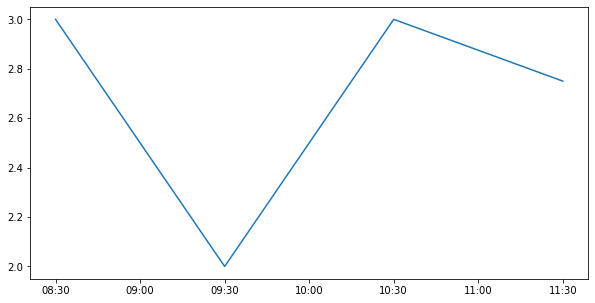

In [6]:
# exemple d'utilisation de mathplotlib :
import matplotlib.pyplot as plt
import matplotlib.dates as md

# force bigger size
plt.rcParams['figure.figsize'] = [10, 5]

# force timestamp format
ax=plt.gca()
xfmt = md.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(xfmt)

x = []   # some datetime
for _ in range(4):
    x.append(datetime(2018, 11, 21, 8 + _, 30, 0, 0))
    
y = [3,2,3,2.75]  # some values

plt.plot(x, y)

plt.show()

In [7]:
#TODO